In [82]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Note: The following do not work with Python 3.12
#import sweetviz as sv
#import shap
#from ydata_profiling import ProfileReport

## Pre Data Cleaning: Readin data and preprocessing individual table

In [83]:
# Read the CSV file
df_recipes = pd.read_csv('data/recipes.csv')

# Consolidated Non-Vegetarian Keywords
non_vegetarian_keywords = list(set([
    'flounder', 'lobsters', 'lump', 'rack', 'shank', 'steak', 'scallops', 'alligator', 
    'livers', 'roe', 'ham', 'turkey', 'chicken', 'duck', 'bacon', 'tuna', 'swordfish', 
    'lobster', 'meatballs', 'salmon', 'sweetbreads', 'breasts', 'chicken-flavored', 
    'ducklings', 'drumstick', 'liver', 'shanks', 'rabbit', 'poultry', 'herring', 
    'mussels', 'clams', 'squid', 'pork', 'veal', 'haddock', 'chorizo', 'chihuahua', 
    'eel', 'stuffing', 'cod', 'gelatin', 'sausage', 'curd', 'thighs', 'lox', 'cabbage', 
    'wonton', 'bone', 'giblets', 'pheasant', 'quail', 'shrimp', 'fish', 'sole', 
    'gizzard', 'Canadian', 'pesto', 'truffles', 'anchovies', 'venison', 'pheasants', 
    'tenderloin', 'meats', 'tripe', 'breast', 'wings', 'ribs', 'sausages', 'trout', 
    'oysters', 'octopus', 'crab', 'prawns', 'catfish', 'sardines', 'mahi', 'halibut', 
    'bass', 'perch', 'tilapia', 'grouper'
]))

# Consolidated Non-Vegan Keywords
non_vegan_keywords = list(set([
    'milk', 'cheese', 'butter', 'egg', 'honey', 'mozzarella-cheddar', 'cream', 'whip', 
    'jarlsberg', 'fontina', 'ham', 'cheesecake', 'hollandaise', 'caviar', 'creamRegular', 
    'custard', 'yogurt', 'gouda', 'margarine', 'beef', 'salmon', 'sour', 'bisquick', 
    'carton', 'cotija', 'creme', 'buttercream', 'buttermilk', 'ricotta', 'cottage', 
    'eggs', 'mayonnaise', 'eggshells', 'lactose-free', 'skim', 'ghee', 'mascarpone', 
    'alfredo', 'whey', 'casein', 'lactose', 'albumin', 'bechamel', 'sour cream', 
    'cream cheese', 'feta', 'gorgonzola', 'parmesan', 'mozzarella', 'cheddar', 'brie', 
    'camembert', 'roquefort', 'stilton', 'blue cheese', 'colby', 'monterey jack', 
    'swiss cheese', 'provolone', 'edam', 'havarti', 'pecorino', 'asiago', 'emmental', 
    'gruyere', 'halloumi', 'manchego', 'paneer', 'queso fresco', 'ricotta salata', 
    'romano', 'taleggio', 'vacherin', 'milk chocolate', 'whey protein', 'casein protein', 
    'egg noodles', 'egg whites', 'egg yolks', 'hollandaise sauce', 'aioli', 'flan', 
    'quiche', 'meringue', 'pavlova', 'egg wash', 'frittata', 'omelette', 'scrambled eggs', 
    'poached eggs', 'hard-boiled eggs', 'deviled eggs', 'eggnog', 'brioche', 'challah', 
    'pound cake', 'sponge cake', 'angel food cake', 'ladyfingers', 'mousse', 'souffle', 
    'creme brulee', 'panna cotta', 'tiramisu', 'yorkshire pudding', 'beef broth', 
    'chicken broth', 'fish sauce', 'oyster sauce', 'worcestershire sauce', 'caesar dressing', 
    'carbonara sauce', 'béarnaise sauce', 'gravlax', 'smoked salmon', 'caviar', 'anchovy paste', 
    'fish stock'
]))


# Function to check if a RecipeIngredientParts is vegetarian
def is_vegetarian(ingredient):
    for keyword in non_vegetarian_keywords:
        if keyword in ingredient.lower():
            return False
    return True

# Function to check if a RecipeIngredientParts is vegan
def is_vegan(ingredient):
    for keyword in non_vegan_keywords:
        if keyword in ingredient.lower():
            return False
    return True

# Apply the is_vegetarian function to the RecipeIngredientParts column
df_recipes['is_vegetarian'] = df_recipes['RecipeIngredientParts'].apply(is_vegetarian)

# Apply the is_vegan function to the RecipeIngredientParts column
df_recipes['is_vegan'] = df_recipes['RecipeIngredientParts'].apply(is_vegan)

# Map the diet category based on the is_vegetarian and is_vegan columns
df_recipes['diet_category'] = df_recipes.apply(lambda row: 'Vegetarian' if row['is_vegetarian'] else 'Vegan' if row['is_vegan'] else 'Omnivore', axis=1)

# create TotalTime_Recipe column
df_recipes['TotalTime_Recipe'] = df_recipes['CookTime'] + df_recipes['PrepTime']

# drop columns
df_recipes = df_recipes.drop(columns=['Name', 'CookTime', 'PrepTime', 'RecipeIngredientParts', 'RecipeIngredientQuantities', 'RecipeYield', 'is_vegetarian', 'is_vegan'])
# dtype conversion
df_recipes["RecipeCategory"] = df_recipes["RecipeCategory"].astype("category")
df_recipes["diet_category"] = df_recipes["diet_category"].astype("category")
# rename columns
df_recipes = df_recipes.rename(columns={"diet_category": "recipe_diet_category"})

df_recipes.info()
df_recipes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75604 entries, 0 to 75603
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   RecipeId              75604 non-null  int64   
 1   RecipeCategory        75604 non-null  category
 2   Calories              75604 non-null  float64 
 3   FatContent            75604 non-null  float64 
 4   SaturatedFatContent   75604 non-null  float64 
 5   CholesterolContent    75604 non-null  float64 
 6   SodiumContent         75604 non-null  float64 
 7   CarbohydrateContent   75604 non-null  float64 
 8   FiberContent          75604 non-null  float64 
 9   SugarContent          75604 non-null  float64 
 10  ProteinContent        75604 non-null  float64 
 11  RecipeServings        48891 non-null  float64 
 12  recipe_diet_category  75604 non-null  category
 13  TotalTime_Recipe      75604 non-null  int64   
dtypes: category(2), float64(10), int64(2)
memory usage: 7.

,RecipeId,RecipeCategory,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,recipe_diet_category,TotalTime_Recipe
0,73440,Other,241.3,10.1,1.2,0.0,13.1,31.8,2.3,1.4,6.7,9.0,Vegetarian,1800
1,365718,Other,370.8,17.5,7.2,22.9,553.3,44.3,1.6,2.2,9.4,8.0,Omnivore,4200
2,141757,Other,377.6,20.9,10.5,45.7,1501.8,36.6,3.8,6.1,12.9,8.0,Vegetarian,6300
3,280351,Other,282.8,16.5,10.3,50.5,630.2,22.8,2.3,2.7,11.7,6.0,Omnivore,19800
4,180505,Other,257.5,8.6,2.4,110.7,160.9,39.8,0.4,30.2,6.3,6.0,Vegan,5400


In [84]:
# readin the diet data
df_diet = pd.read_csv('data/diet.csv')

# chcek for missing values in the data
print(df_diet.isnull().sum())

# replace missing value in Diet with "Omnivore"
print(df_diet["Diet"].unique())
df_diet["Diet"] = df_diet["Diet"].fillna("Omnivore")

# check again
print(df_diet.isnull().sum())

# Change data type of Diet to category
df_diet["Diet"] = df_diet["Diet"].astype("category")

# rename the column Diet to diet_category
df_diet = df_diet.rename(columns={"Diet": "user_diet_category"})

df_diet.info()
df_diet.head()


AuthorId    0
Diet        1
Age         0
dtype: int64
['Vegetarian' 'Vegan' 'Omnivore' nan]
AuthorId    0
Diet        0
Age         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271907 entries, 0 to 271906
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   AuthorId            271907 non-null  object  
 1   user_diet_category  271907 non-null  category
 2   Age                 271907 non-null  int64   
dtypes: category(1), int64(1), object(1)
memory usage: 4.4+ MB


,AuthorId,user_diet_category,Age
0,10000120E,Vegetarian,46
1,1000014D,Vegan,18
2,1000015A,Vegetarian,58
3,1000016E,Vegetarian,32
4,1000027E,Vegan,61


In [85]:
# read csv file
df_requests = pd.read_csv('data/requests.csv')

# check for missing values
print(df_requests.isnull().sum())

#dtype
df_requests['HighCalories'] = df_requests['HighCalories'].astype('boolean')

df_requests['HighProtein'] = df_requests['HighProtein'].replace({'Indifferent': False, 'Yes': True})
df_requests['HighProtein'] = df_requests['HighProtein'].astype('boolean')

df_requests['LowFat'] = df_requests['LowFat'].astype('boolean')

df_requests['LowSugar'] = df_requests['LowSugar'].replace({'Indifferent': False, '0': True})
df_requests['LowSugar'] = df_requests['LowSugar'].astype('boolean')

df_requests['HighFiber'] = df_requests['HighFiber'].astype('boolean')

# rename columns
df_requests.rename(columns={'Time': 'TotalTime_Requested'}, inplace=True)
df_requests.rename(columns={'HighCalories': 'HighCalories_Requested'}, inplace=True)
df_requests.rename(columns={'HighProtein': 'HighProtein_Requested'}, inplace=True)
df_requests.rename(columns={'LowFat': 'LowFat_Requested'}, inplace=True)
df_requests.rename(columns={'LowSugar': 'LowSugar_Requested'}, inplace=True)
df_requests.rename(columns={'HighFiber': 'HighFiber_Requested'}, inplace=True)

df_requests.info() 
df_requests.head()


AuthorId        0
RecipeId        0
Time            0
HighCalories    0
HighProtein     0
LowFat          0
LowSugar        0
HighFiber       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140195 entries, 0 to 140194
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   AuthorId                140195 non-null  object 
 1   RecipeId                140195 non-null  int64  
 2   TotalTime_Requested     140195 non-null  float64
 3   HighCalories_Requested  140195 non-null  boolean
 4   HighProtein_Requested   140195 non-null  boolean
 5   LowFat_Requested        140195 non-null  boolean
 6   LowSugar_Requested      140195 non-null  boolean
 7   HighFiber_Requested     140195 non-null  boolean
dtypes: boolean(5), float64(1), int64(1), object(1)
memory usage: 4.5+ MB


,AuthorId,RecipeId,TotalTime_Requested,HighCalories_Requested,HighProtein_Requested,LowFat_Requested,LowSugar_Requested,HighFiber_Requested
0,2001012259B,73440,1799.950949,False,False,False,True,False
1,437641B,365718,4201.820980,False,True,False,False,True
2,1803340263D,141757,6299.861496,False,False,True,False,False
3,854048B,280351,19801.365796,False,True,True,True,True
4,2277685E,180505,5400.093457,False,False,False,True,False


In [86]:
# load reviews data
df_reviews = pd.read_csv('data/reviews.csv')

#sns.countplot(data=df_reviews, x='Rating')  # Rating is only 2 except 2 rows -> drop Rating column
df_reviews = df_reviews.drop('Rating', axis=1)

# check for missing values
# print(df_reviews.isnull().sum())

# dtype 
df_reviews['Like'] = df_reviews['Like'].astype('boolean')

df_reviews.info()
df_reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140195 entries, 0 to 140194
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   AuthorId   140195 non-null  object 
 1   RecipeId   140195 non-null  int64  
 2   Like       97381 non-null   boolean
 3   TestSetId  42814 non-null   float64
dtypes: boolean(1), float64(1), int64(1), object(1)
memory usage: 3.5+ MB


/var/folders/kd/4w5fjp_536z4vbs4r30zh2ym0000gn/T/ipykernel_77265/1545122145.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reviews = pd.read_csv('data/reviews.csv')


,AuthorId,RecipeId,Like,TestSetId
0,2492191A,33671,<NA>,1.0
1,2002019979A,92647,<NA>,2.0
2,408594E,161770,<NA>,3.0
3,2001625557E,108231,<NA>,4.0
4,2001427116E,71109,<NA>,5.0


## Data aggregation (Merge the tables)

In [87]:
# keep all request, add info about custormers diet when exit -> df_diet right_join df_requests
merged_df_diet_request = df_diet.merge(df_requests, on='AuthorId', how='right')
#merged_df_diet_request.info()

# request without matched recipe, or recipe without request is useless  -> normal join 
merged_df_diet_request_recipes = merged_df_diet_request.merge(df_recipes, on='RecipeId')
#merged_df_diet_request_recipes.info()

# review without request,recipes is useless -> left 
merged_df_diet_request_recipes_reviews = merged_df_diet_request_recipes.merge(df_reviews, on=['RecipeId', 'AuthorId'], how='left')
#merged_df_diet_request_recipes_reviews.info()

merged_df = merged_df_diet_request_recipes_reviews

# drop AuthorId, RecipeId columns after merged
merged_df = merged_df.drop('AuthorId', axis=1)
merged_df = merged_df.drop('RecipeId', axis=1)

# test_dataframe
test_dataframe = merged_df[merged_df['TestSetId'].notna()]
test_dataframe = test_dataframe.drop('TestSetId', axis=1)
test_dataframe = test_dataframe.drop('Like', axis=1)
test_dataframe.info()

# train_and_val_dataframe
merged_df = merged_df[merged_df['Like'].notna()]
merged_df = merged_df[merged_df['TestSetId'].isna()]
merged_df = merged_df.drop('TestSetId', axis=1)
merged_df.info()
merged_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 42814 entries, 5 to 140191
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_diet_category      42814 non-null  category
 1   Age                     42814 non-null  int64   
 2   TotalTime_Requested     42814 non-null  float64 
 3   HighCalories_Requested  42814 non-null  boolean 
 4   HighProtein_Requested   42814 non-null  boolean 
 5   LowFat_Requested        42814 non-null  boolean 
 6   LowSugar_Requested      42814 non-null  boolean 
 7   HighFiber_Requested     42814 non-null  boolean 
 8   RecipeCategory          42814 non-null  category
 9   Calories                42814 non-null  float64 
 10  FatContent              42814 non-null  float64 
 11  SaturatedFatContent     42814 non-null  float64 
 12  CholesterolContent      42814 non-null  float64 
 13  SodiumContent           42814 non-null  float64 
 14  CarbohydrateContent     42

<class 'pandas.core.frame.DataFrame'>
Index: 97381 entries, 0 to 140194
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_diet_category      97381 non-null  category
 1   Age                     97381 non-null  int64   
 2   TotalTime_Requested     97381 non-null  float64 
 3   HighCalories_Requested  97381 non-null  boolean 
 4   HighProtein_Requested   97381 non-null  boolean 
 5   LowFat_Requested        97381 non-null  boolean 
 6   LowSugar_Requested      97381 non-null  boolean 
 7   HighFiber_Requested     97381 non-null  boolean 
 8   RecipeCategory          97381 non-null  category
 9   Calories                97381 non-null  float64 
 10  FatContent              97381 non-null  float64 
 11  SaturatedFatContent     97381 non-null  float64 
 12  CholesterolContent      97381 non-null  float64 
 13  SodiumContent           97381 non-null  float64 
 14  CarbohydrateContent     97

,user_diet_category,Age,TotalTime_Requested,HighCalories_Requested,HighProtein_Requested,LowFat_Requested,LowSugar_Requested,HighFiber_Requested,RecipeCategory,Calories,...,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,recipe_diet_category,TotalTime_Recipe,Like
0,Vegetarian,46,1799.950949,False,False,False,True,False,Other,241.3,...,0.0,13.1,31.8,2.3,1.4,6.7,9.0,Vegetarian,1800,False
1,Vegetarian,35,1799.748443,True,True,True,False,False,Other,241.3,...,0.0,13.1,31.8,2.3,1.4,6.7,9.0,Vegetarian,1800,False
2,Vegetarian,22,1798.730719,True,False,False,True,False,Other,241.3,...,0.0,13.1,31.8,2.3,1.4,6.7,9.0,Vegetarian,1800,False
3,Vegan,70,1800.532044,True,True,True,True,True,Other,241.3,...,0.0,13.1,31.8,2.3,1.4,6.7,9.0,Vegetarian,1800,False
4,Vegan,63,1800.038527,False,True,True,True,False,Other,241.3,...,0.0,13.1,31.8,2.3,1.4,6.7,9.0,Vegetarian,1800,False


## Post Data Cleaning (after merged) 

In [88]:
# https://ishanjainoffical.medium.com/choosing-the-right-correlation-pearson-vs-spearman-vs-kendalls-tau-02dc7d7dd01d
def plot_corr(df, title):
    if 'Like' in df:
        df = df[df['Like'] == 1]
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(25, 7))
    nutrients_corr = df.corr(method='kendall') 
    mask = np.triu(np.ones_like(nutrients_corr, dtype=bool))
    cmap = sns.color_palette("coolwarm", as_cmap=True)
    sns.heatmap(nutrients_corr, mask=mask, cmap=cmap, annot=True, fmt=".2f", ax=ax1, center=0)
    ax1.set_title(title + ' - kendall', fontsize=16)
    nutrients_corr = df.corr(method='pearson')
    mask = np.triu(np.ones_like(nutrients_corr, dtype=bool))
    cmap = sns.color_palette("coolwarm", as_cmap=True)
    sns.heatmap(nutrients_corr, mask=mask, cmap=cmap, annot=True, fmt=".2f", ax=ax2, center=0)
    ax2.set_title(title + ' - pearson', fontsize=16)
    plt.show()

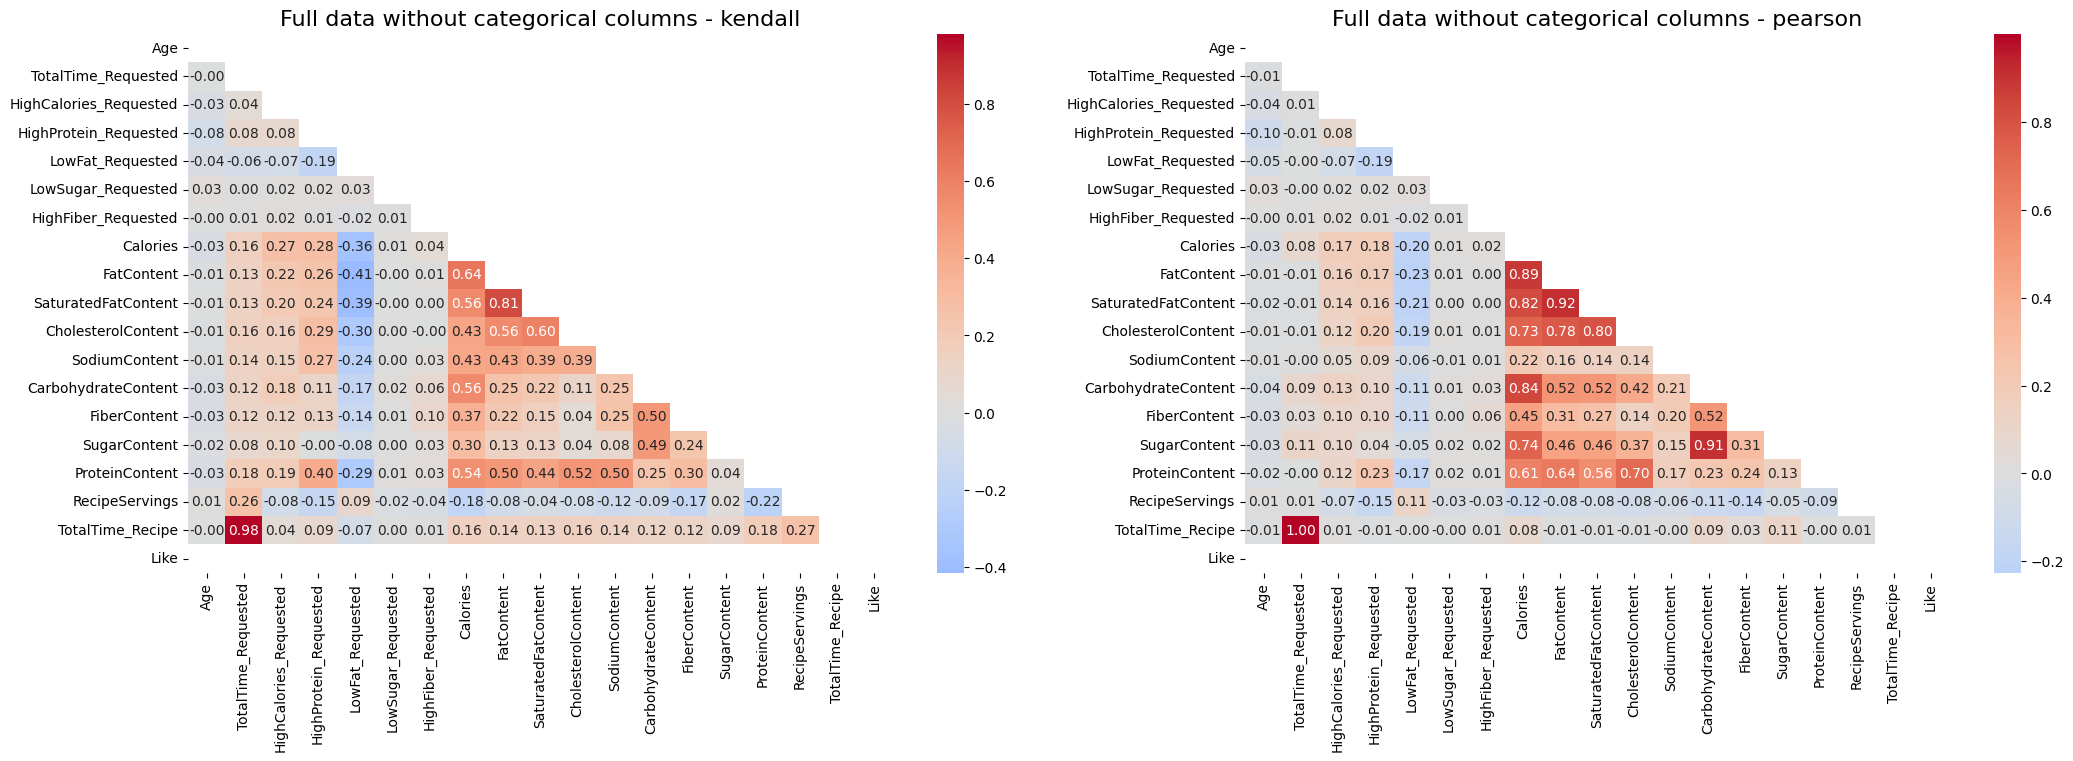

In [89]:
# plot corr for whole merged_df
plot_corr(merged_df.drop(columns=['user_diet_category', 'RecipeCategory', 'recipe_diet_category']), "Full data without categorical columns")


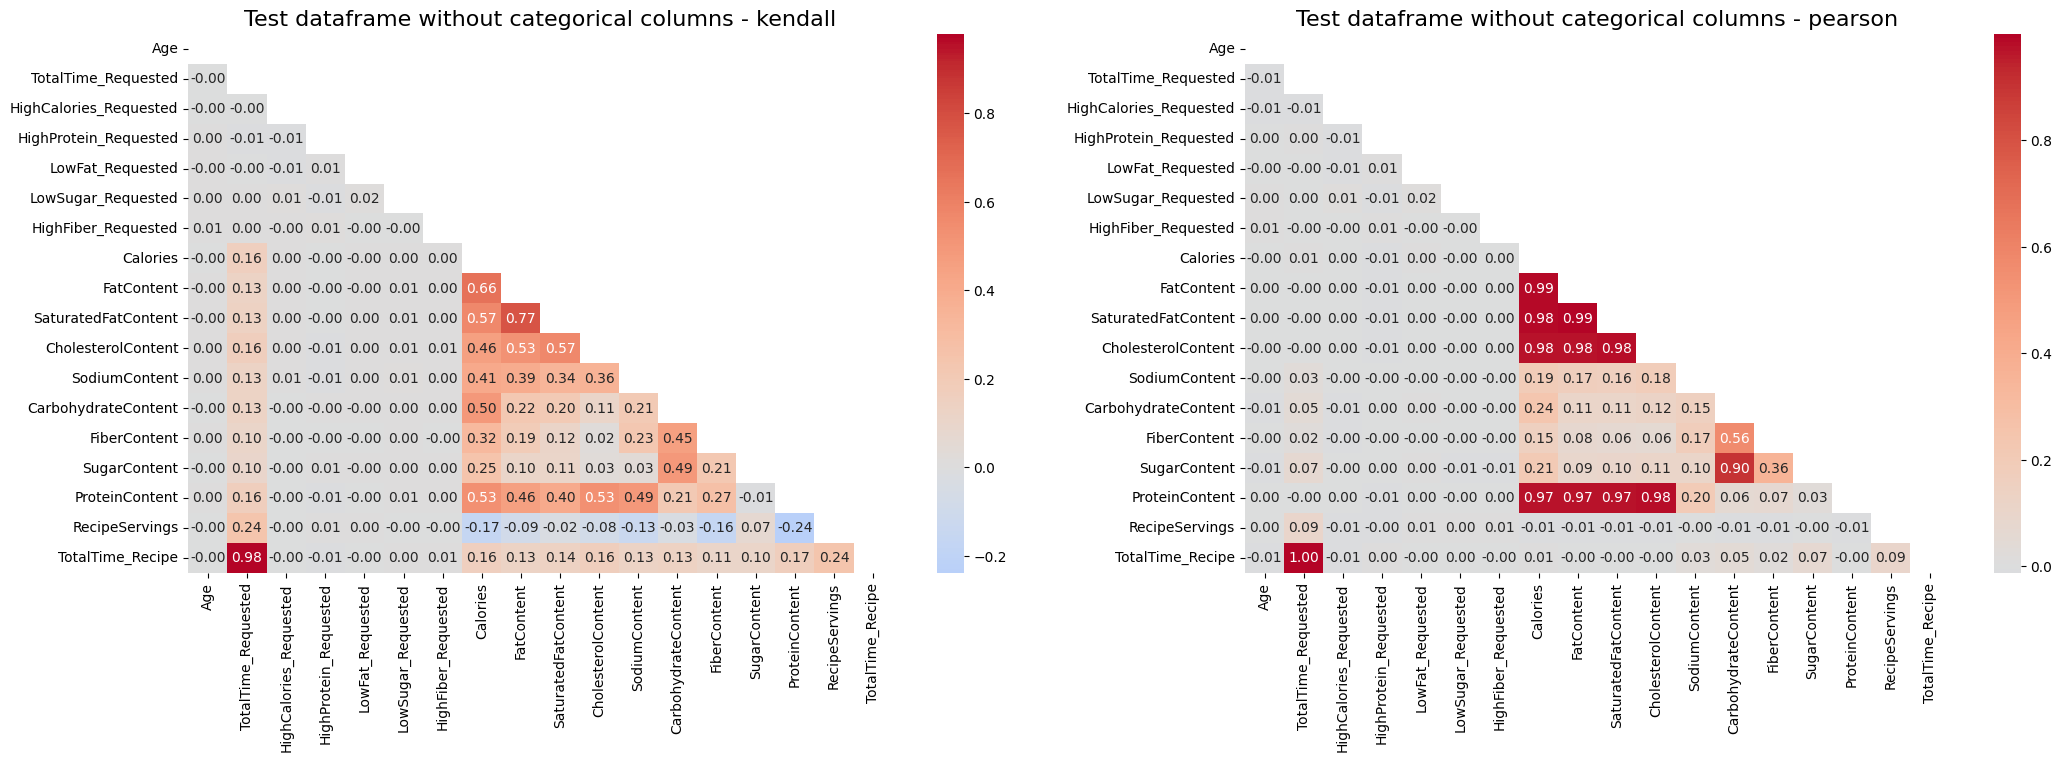

In [90]:
# plot the test_dataframe 
plot_corr(test_dataframe.drop(columns=['user_diet_category', 'RecipeCategory', 'recipe_diet_category']), "Test dataframe without categorical columns")

In [91]:
# TODO: add Hangyu Time analysis -> TotalTime_Requested and TotalTime_Recipe are kinda the same with +- 1 minute difference 
# and also does not have correlation with other attributes 
# -> Drop
merged_df = merged_df.drop(columns=['TotalTime_Requested', 'TotalTime_Recipe'])

" UNCOMMENT FOR THE REASONING \ndf_totalTime_Age = merged_df[['TotalTime_Recipe', 'Age', 'TotalTime_Requested', ]].where(merged_df['Like'] == True)\ncorrMatrix = df_totalTime_Age.corr()\nsns.heatmap(corrMatrix, annot=True)\n"

### Nutriens analysis -> which columns to keep (Comment out after decided ) 

{'Calories': 3613, 'FatContent': 205, 'SaturatedFatContent': 88, 'CholesterolContent': 691, 'SodiumContent': 5384, 'CarbohydrateContent': 473, 'FiberContent': 28, 'SugarContent': 301, 'ProteinContent': 100}


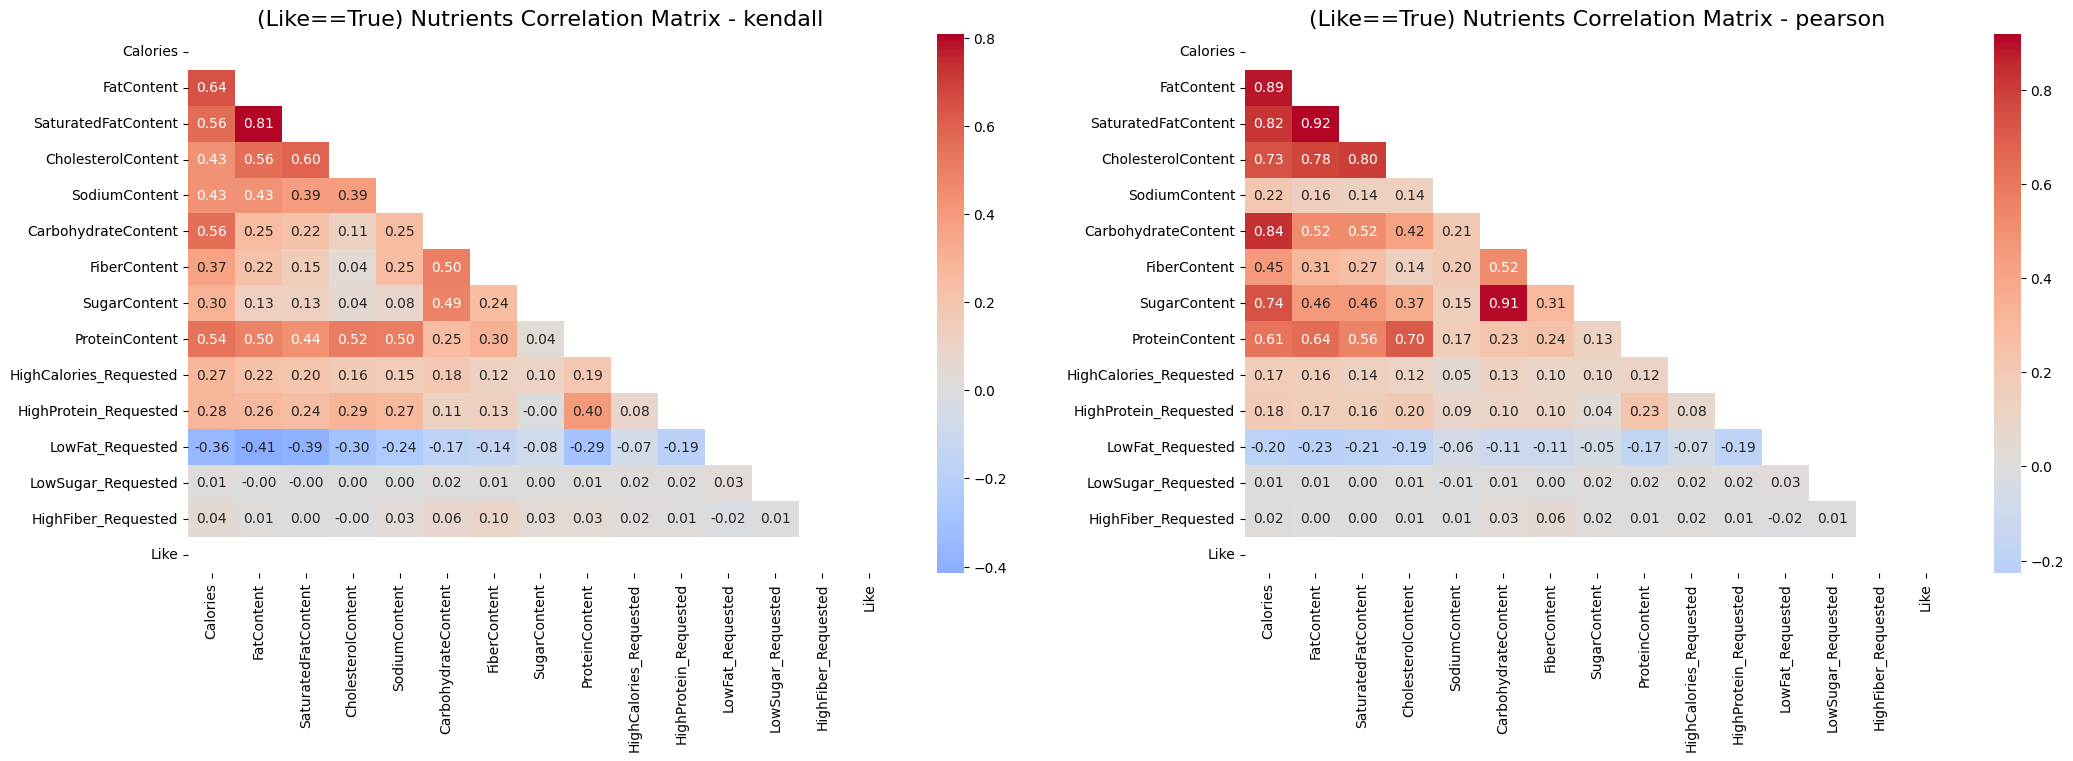

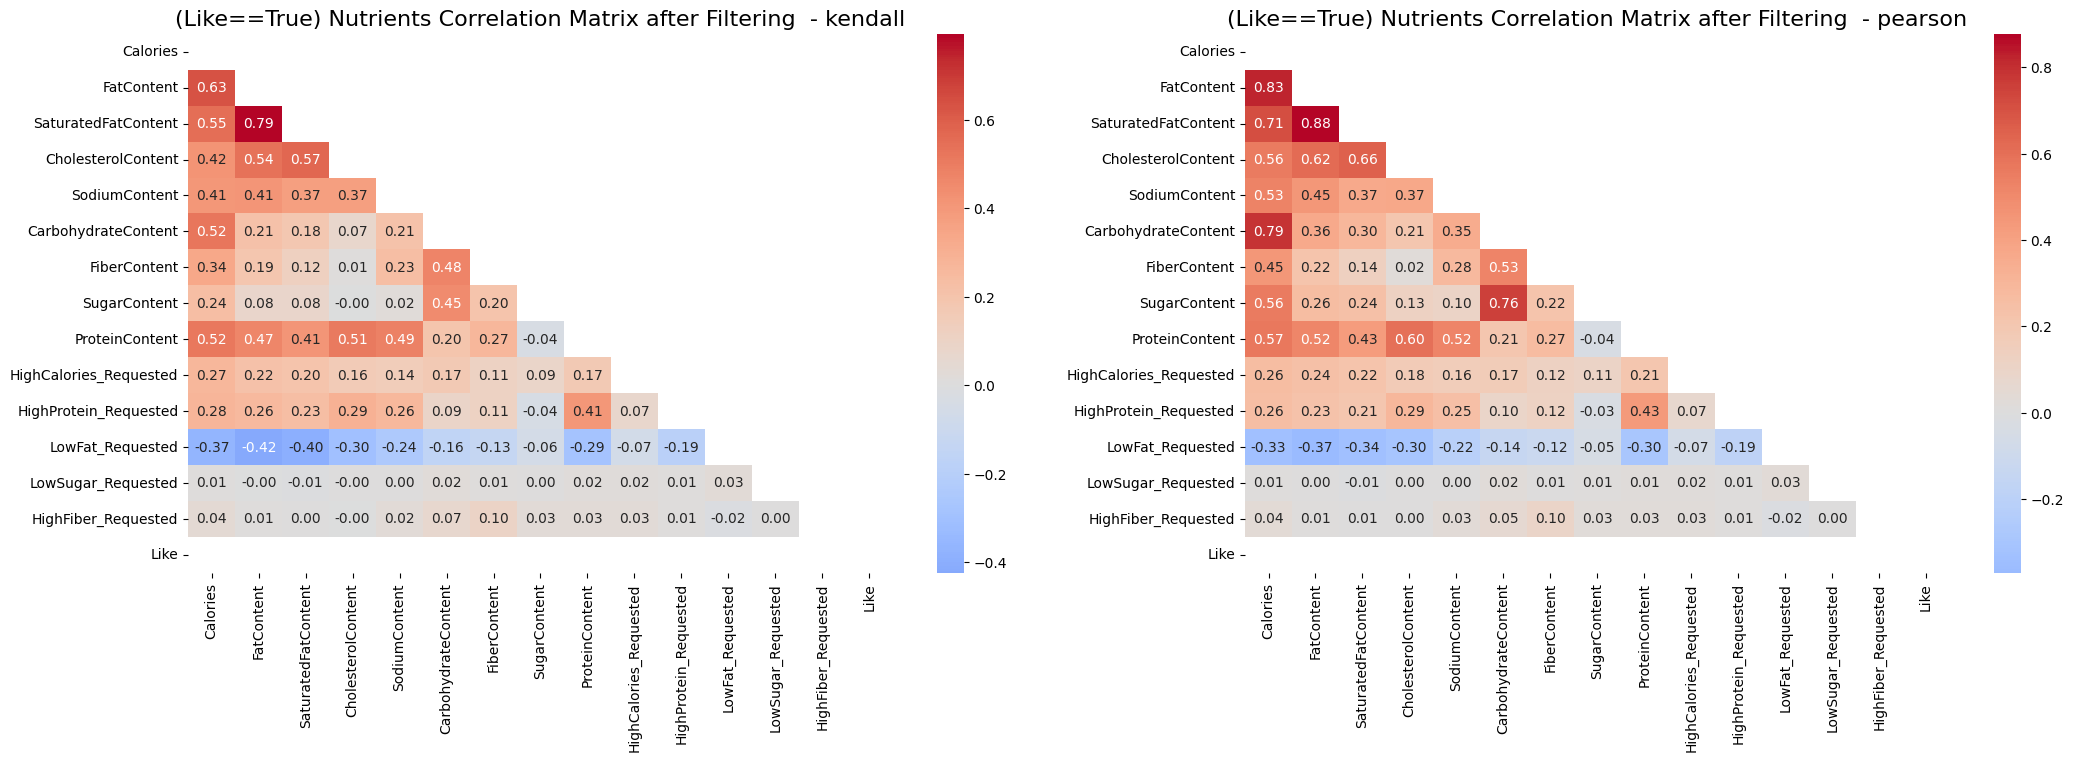

In [92]:
df_nutrients = merged_df[['Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent', 
                          'HighCalories_Requested', 'HighProtein_Requested', 'LowFat_Requested', 'LowSugar_Requested', 'HighFiber_Requested', 'Like']]

# for each nutrien column, find threshold where precent of datapoints above this threashold is 1%
threshold_map = {}
for col in df_nutrients.columns:
    if col in ['HighCalories_Requested', 'HighProtein_Requested', 'LowFat_Requested', 'LowSugar_Requested', 'HighFiber_Requested', 'Like']:
        continue
    for i in range(10000):
        threshold = i
        percent = (df_nutrients[df_nutrients[col] > threshold][col].count() / df_nutrients[col].count())*100
        if percent <= 1:
            threshold_map[col] = threshold
            break
print(threshold_map)
# remove outliers and plot hist for each nutrient column above 
"""
for col in df_nutrients.columns:
    if col in ['HighCalories_Requested', 'HighProtein_Requested', 'HighFat_Requested', 'HighSugar_Requested', 'HighFiber_Requested', 'Like']:
        continue
    df_temp = df_nutrients[df_nutrients[col] < threshold_map[col]]
    plt.figure(figsize=(20, 2))
    plt.hist(df_temp[col], bins=200)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(col + ' Distribution under 1% threshold of value=' + str(threshold_map[col]))
    plt.show()
"""

#df_nutrients_after_threshold := df_nutrients with all threshold filtered 
df_nutrients_after_threshold = df_nutrients[df_nutrients['Calories'] < threshold_map['Calories']] 
df_nutrients_after_threshold = df_nutrients_after_threshold[df_nutrients_after_threshold['FatContent'] < threshold_map['FatContent']]
df_nutrients_after_threshold = df_nutrients_after_threshold[df_nutrients_after_threshold['SaturatedFatContent'] < threshold_map['SaturatedFatContent']]
df_nutrients_after_threshold = df_nutrients_after_threshold[df_nutrients_after_threshold['CholesterolContent'] < threshold_map['CholesterolContent']]
df_nutrients_after_threshold = df_nutrients_after_threshold[df_nutrients_after_threshold['SodiumContent'] < threshold_map['SodiumContent']]
df_nutrients_after_threshold = df_nutrients_after_threshold[df_nutrients_after_threshold['CarbohydrateContent'] < threshold_map['CarbohydrateContent']]
df_nutrients_after_threshold = df_nutrients_after_threshold[df_nutrients_after_threshold['FiberContent'] < threshold_map['FiberContent']]
df_nutrients_after_threshold = df_nutrients_after_threshold[df_nutrients_after_threshold['SugarContent'] < threshold_map['SugarContent']]
df_nutrients_after_threshold = df_nutrients_after_threshold[df_nutrients_after_threshold['ProteinContent'] < threshold_map['ProteinContent']]

plot_corr(df_nutrients, "(Like==True) Nutrients Correlation Matrix")
plot_corr(df_nutrients_after_threshold, "(Like==True) Nutrients Correlation Matrix after Filtering ")
